In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('flight_price.csv')

In [3]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.shape

(300153, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
data['flight'].nunique()

1561

In [7]:
data.drop('flight', axis=1, inplace= True)

In [8]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [11]:
data['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [12]:
data['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [13]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [14]:
data['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [15]:
data['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [16]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [17]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

# EDA

#### Total passengers per Airline

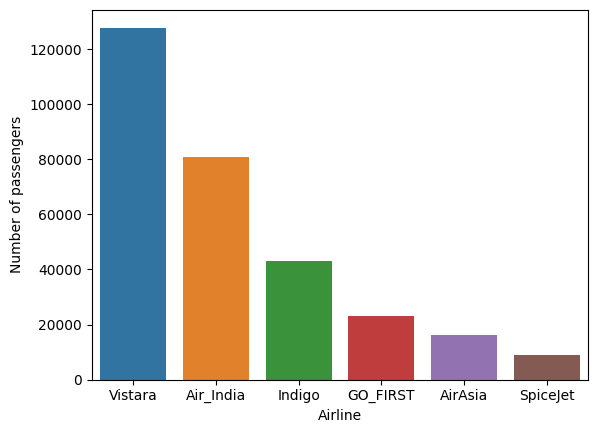

In [18]:
sns.countplot(data=data, x='airline', order=data['airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Number of passengers')
plt.show()

#### 

#### Avg. Ticket price per Airline

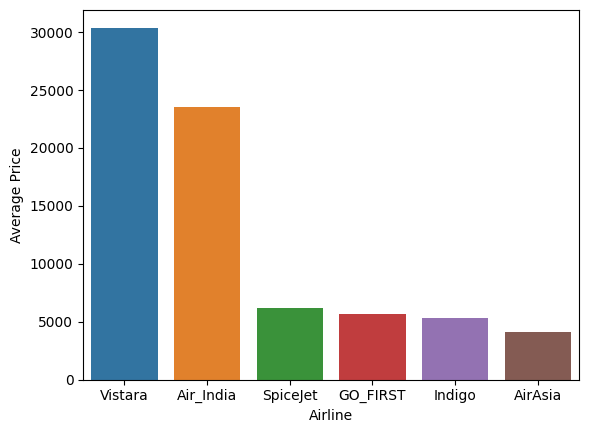

In [19]:
avg_price = data.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

#### Tier-wise distribution for passengers

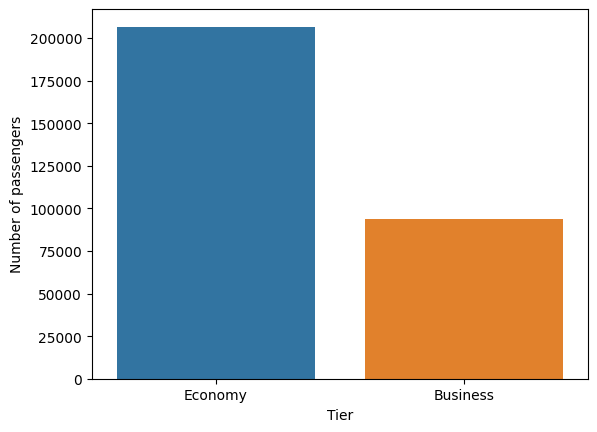

In [20]:
sns.countplot(data=data, x='class', order=data['class'].value_counts().index)
plt.xlabel('Tier')
plt.ylabel('Number of passengers')
plt.show()

#### Avg. ticket price tier-wise

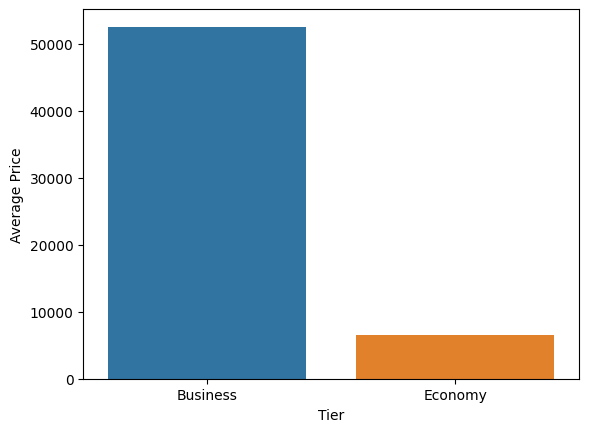

In [21]:
tier_prices = data.groupby('class')['price'].mean().reset_index()
sns.barplot(x='class', y='price', data=tier_prices)
plt.xlabel('Tier')
plt.ylabel('Average Price')
plt.show()

#### Avg. duration as per stops taken

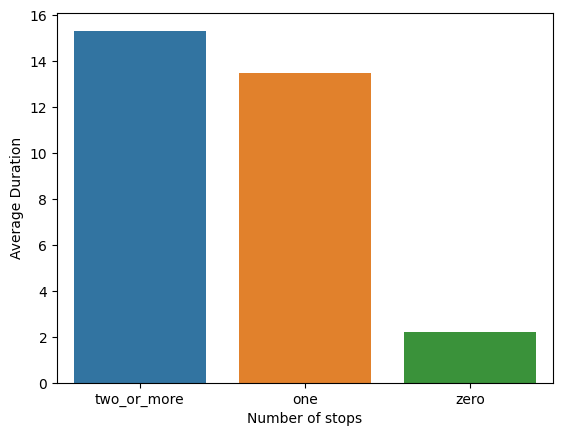

In [22]:
avg_dura = data.groupby('stops')['duration'].mean().reset_index()
avg_dura = avg_dura.sort_values(by='duration',ascending=False)
sns.barplot(x='stops', y='duration', data=avg_dura)
plt.xlabel('Number of stops')
plt.ylabel('Average Duration')
plt.show()

#### Price(Target) distribution

<Axes: xlabel='price', ylabel='Count'>

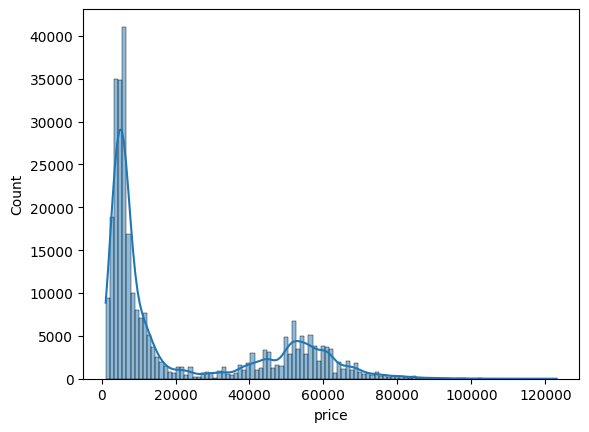

In [23]:
sns.histplot(data=data, x='price', kde=True)

#### Scatterplot of Duration of the flights and the ticket price

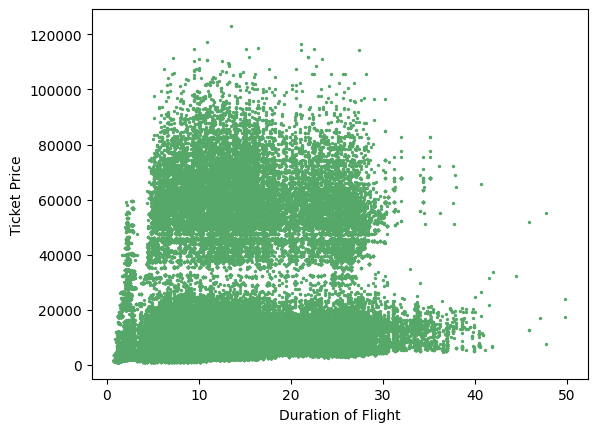

In [24]:
plt.scatter(data['duration'], data['price'], s=2, color= '#55A868')
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

#### Relation between number of stops and price of ticket

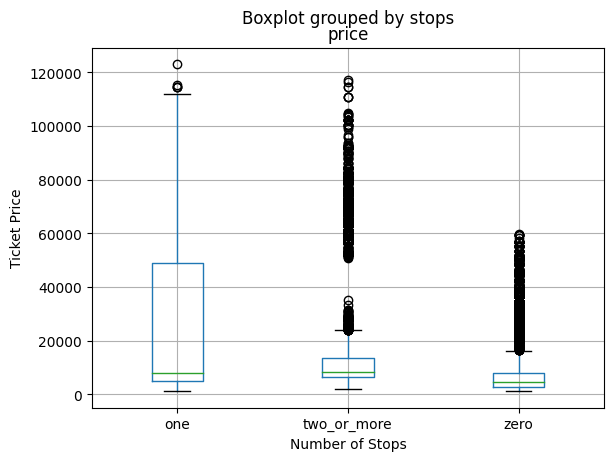

In [25]:
data.boxplot(column='price', by='stops')
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

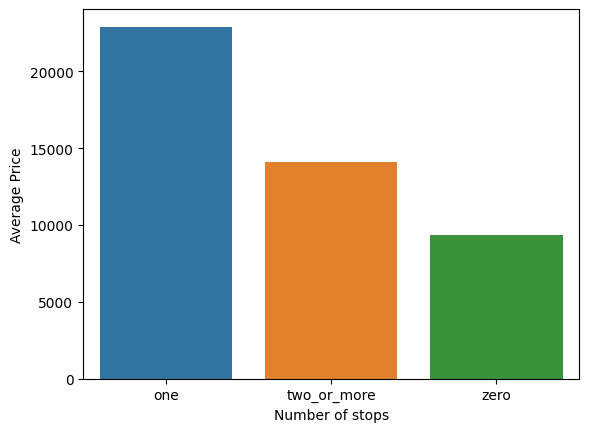

In [26]:
avg_pric = data.groupby('stops')['price'].mean().reset_index()
avg_pric = avg_pric.sort_values(by='price',ascending=False)
sns.barplot(x='stops', y='price', data=avg_pric)
plt.xlabel('Number of stops')
plt.ylabel('Average Price')
plt.show()

#### Dividing the dataset according to categorical and numerical 

In [27]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [28]:
numeric_data.head()

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


In [29]:
categorical_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


#### Correlation matrix between the numerical columns

In [31]:
corr_mat = numeric_data.corr()
corr_mat

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


#### Heatmap representation of that corrrelation matrix

<Axes: >

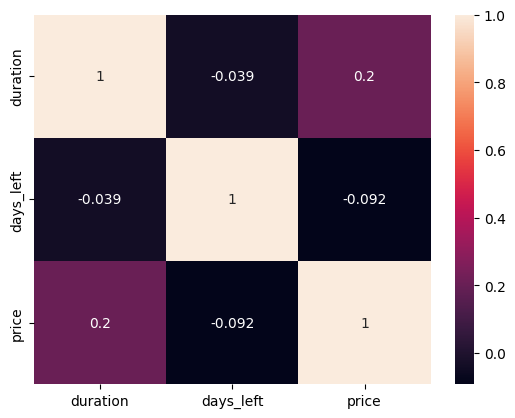

In [32]:
sns.heatmap(data=corr_mat, annot=True)

#### From the heatmap we can assume that there is no high correlation between the numerical columns

# Encoding

#### Here we are using label encoding for the categorical values as the data's ranking is very important

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_data:
    data[col] = le.fit_transform(data[col])

In [34]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


## Checking for any missing values

#### No missing values found

In [35]:
data.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [53]:
names = pd.Series(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left'])

# Scaling of Data

#### We are using standard scaler method for the scaling of the features as it handles the outliers and is preserving the distribution of the data 

In [36]:
from sklearn.preprocessing import StandardScaler
X = data.drop('price', axis=1)
y = data['price']

In [54]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_norm, columns=names)
X_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875


# Train Test Split

#### Splitting the data for training the model and test on new data

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)


y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)


accuracy_train = reg.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


accuracy_test = reg.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9045877099195366 Test: 0.9046540517018563
MSE - Train: 49176432.66919169 Test: 49071365.66441457
R2 - Train: 0.9045877099195366 Test: 0.9046540517018563


#### The model accurace and explainability is of 90.45%

# Decision Tree 

In [60]:
from sklearn.tree import DecisionTreeRegressor

DSReg = DecisionTreeRegressor(max_depth=5, random_state=42)

DSReg.fit(X_train, y_train)

y_pred_train1 = DSReg.predict(X_train)
y_pred_test1 = DSReg.predict(X_test)


accuracy_train1 = DSReg.score(X_train, y_train)
mse_train1 = mean_squared_error(y_train, y_pred_train1)
r2_train1 = r2_score(y_train, y_pred_train1)


accuracy_test1 = DSReg.score(X_test, y_test)
mse_test1 = mean_squared_error(y_test, y_pred_test1)
r2_test1 = r2_score(y_test, y_pred_test1)


print("Accuracy - Train: {:} Test: {:}".format(accuracy_train1, accuracy_test1))
print("MSE - Train: {:} Test: {:}".format(mse_train1, mse_test1))
print("R2 - Train: {:} Test: {:}".format(r2_train1, r2_test1))

Accuracy - Train: 0.9443337647221068 Test: 0.9440255590567298
MSE - Train: 28690925.129059654 Test: 28808169.706377193
R2 - Train: 0.9443337647221068 Test: 0.9440255590567298


#### The model accuracy and explainibility is 94.40%

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rand = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

rand.fit(X_train, y_train)

y_pred_train2 = rand.predict(X_train)
y_pred_test2 = rand.predict(X_test)

accuracy_train2 = rand.score(X_train, y_train)
mse_train2 = mean_squared_error(y_train, y_pred_train2)
r2_train2 = r2_score(y_train, y_pred_train2)

accuracy_test2 = rand.score(X_test, y_test)
mse_test2 = mean_squared_error(y_test, y_pred_test2)
r2_test2 = r2_score(y_test, y_pred_test2)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train2, accuracy_test2))
print("MSE - Train: {:} Test: {:}".format(mse_train2, mse_test2))
print("R2 - Train: {:} Test: {:}".format(r2_train2, r2_test2))

Accuracy - Train: 0.9636967842748451 Test: 0.9622533004754253
MSE - Train: 18711034.419964854 Test: 19426961.79603942
R2 - Train: 0.9636967842748451 Test: 0.9622533004754253


#### This model with a max_depth of 10 is giving a 96.22% accuracy and explainibility

#### As the models are giving a 90+ % result overall without getting Overfitting so no pruning required

#### The best performing model is Random Forest Regressor with 96.22% accuracy